# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = study_results.merge(mouse_metadata)

# Display the data table for preview
mouse_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [8]:
# Checking the number of mice.
mouse_data_complete["Mouse ID"].nunique()

249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data_complete[mouse_data_complete.duplicated(["Mouse ID","Timepoint"])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_complete[mouse_data_complete["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= mouse_data_complete[mouse_data_complete["Mouse ID"] != "g989"]

In [19]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen                              
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
mean_tumor= mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor= mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor= mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor= mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std() 
sem_tumor= mouse_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem() 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                          "Median Tumor Volume":median_tumor,
                          "Tumor Volume Variance":variance_tumor,
                          "Tumor Volume Std. Dev.":std_tumor,
                          "Tumor Volume Std. Err.": sem_tumor})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_df.describe()
# Using the aggregation method, produce the same summary statistics in a single line

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,50.976144,49.942960,47.708346,6.809671,0.499641
std,5.621333,4.712429,16.057123,1.218709,0.102544
min,40.216745,40.673236,23.486704,4.846308,0.320955
25%,52.389707,51.085014,40.055400,6.328083,0.475424
50%,53.060651,51.819532,45.831020,6.766916,0.514641
75%,54.183257,52.396036,60.738703,7.793357,0.579276
max,55.235638,53.698743,68.553577,8.279709,0.603860


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

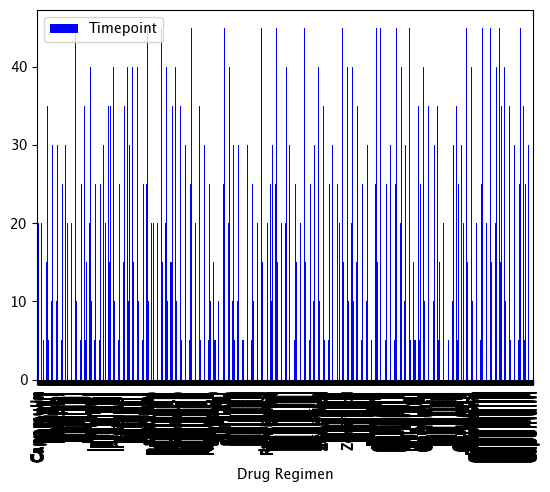

In [82]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
totalrow_df = clean_df[["Timepoint","Drug Regimen"]]
totalrow_df.plot.bar(x = "Drug Regimen", y= "Timepoint", color= "blue")

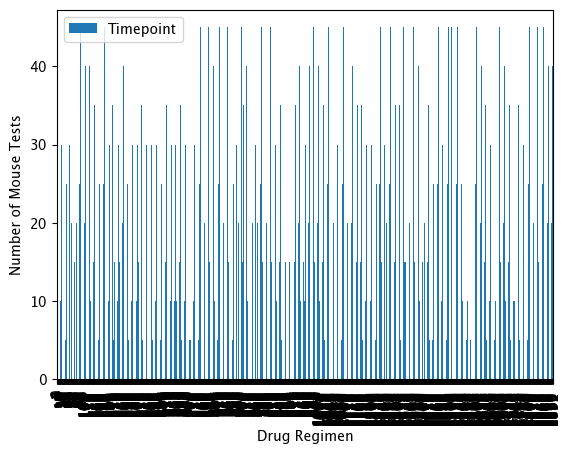

In [91]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
totalrow_chart = totalrow_df.plot(kind="bar")
totalrow_chart.set_xlabel("Drug Regimen")
totalrow_chart.set_ylabel("Number of Mouse Tests")

plt.show()

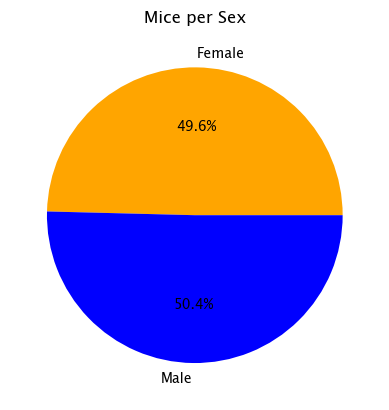

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_sex = clean_df.groupby("Sex")[["Mouse ID"]].nunique()
gender_sex_chart = gender_sex["Mouse ID"].plot(kind="pie",label="", title="Mice per Sex", labels=mice_sex.index,autopct='%1.1f%%',legend=False,startangle= 0,colors=["orange","blue"])

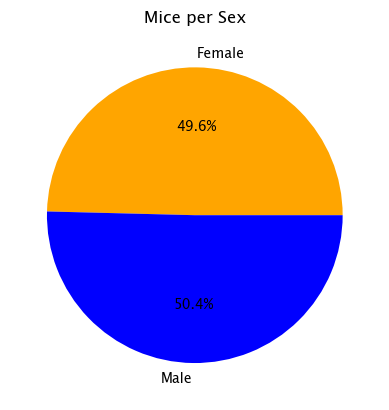

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig1, ax1 = plt.subplots()
ax1.pie(gender_sex["Mouse ID"], labels=gender_sex.index, autopct='%1.1f%%',startangle=0,colors=["orange","blue"])
plt.title("Mice per Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [113]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ram_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Inf_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Cef_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint



In [120]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [115]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

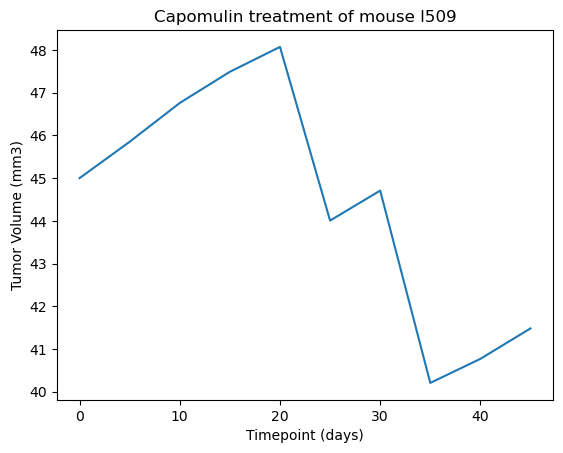

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


/var/folders/r9/b9jcs13x2mq3_v_6g3mb_k400000gn/T/ipykernel_31456/496312105.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cap_mean = Cap_df.groupby(['Mouse ID']).mean()


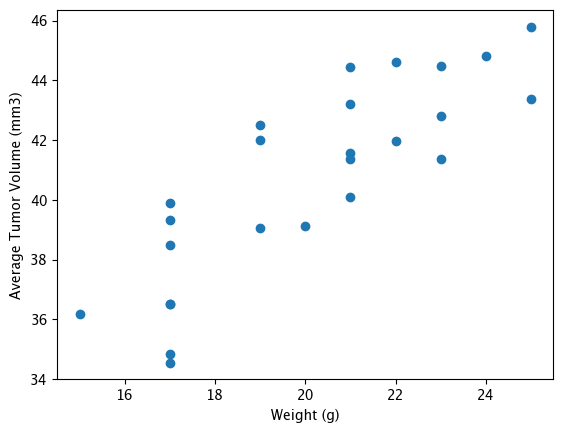

In [123]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_mean = Cap_df.groupby(['Mouse ID']).mean()
plt.scatter(cap_mean['Weight (g)'],cap_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [124]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(cap_mean['Weight (g)'],cap_mean['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [126]:
reg =st.linregress(cap_mean['Weight (g)'],cap_mean['Tumor Volume (mm3)'])
reg

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [127]:
slope=0.9544396890241049 
intercept= 21.552160532685008

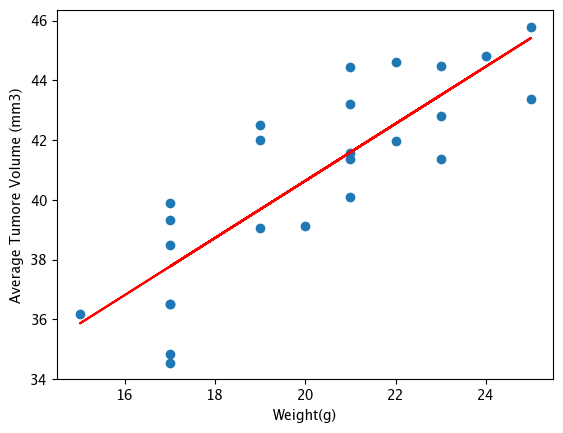

In [131]:
y_values = cap_mean['Weight (g)']*slope+intercept
plt.scatter(cap_mean['Weight (g)'],cap_mean['Tumor Volume (mm3)'])
plt.plot(cap_mean['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()